# Medicare Notes

- So, what is medicare? It is health care that is available to everyone 65 and older, and also some younger people with disabilities. 

- It does not cost a premium, generally, for people over 65. 

- It consists of Part A (Hospital Insurance) and Part B (Medicare Insurance).
  - Part A is the usual in-hospital visit stuff.
  - Part B is the outpatient stuff.

# Medicare Advantage

Medicare Advantage programs provide supplemental benefits. There are many types of MA plans:

- HMO, PPO, PFFS (private fee for service), SNP. 
- One buys these to get additional coverage, I take it (or maybe it functions as a way to pay more than medicare allows.

Enrollment in different plans differs. From the [Centers for Medicare and Medicaid Services](http://www.cms.gov), one can get plan statistics that is, enrollment in medicare advantage plans. 

Here are some links from which one can get penetration data and then plan choice data:

In [1]:
import numpy as np
import os
import pandas as pd
import requests
import time

import matplotlib.pyplot as plt

from zipfile import ZipFile

%matplotlib inline

# Downloading Zip Files

To find this data via browsing, the penetration data is [here](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/MCRAdvPartDEnrolData/MA-State-County-Penetration.html), while the enrollment in specific plans is [here](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/MCRAdvPartDEnrolData/Monthly-MA-Enrollment-by-State-County-Contract.html)

## Additional Information

### Choice/Enrollment Data

In the choice data set, we have data by State, County, and Contract. The organization types include:

1. Local CCP
2. Regional CCP
3. MSA
4. PFFS
5. Demonstrations
6. National PACE
7. 1976 Cost
8. HCCP - 1933 Cost
9. Employer Direct PFFS

These are the type of contract that the organization holds with the CMS. So, let's think about what each of these is. 

### Penetration Data

Here, Eligibles include the number of medicare eligibles in the county. Enrolled claims to be the number of _PDP enrollees_ in the county, which we should be careful about. I'm thinking that the number of enrollees in a medicare advantage plan should be computed from the enrollment data, not the penetration data, which can be used to give us the share of medicare receivers who are enrolled in some plan.


# Plan information and Background

The Balanced Budget Act (BBA) of 1997 established Part C of the Medicare program. The BBA authorized CMS (Center for Medicare and Medicaid Services) to contract with public or private organizations, including traditional and new options. Don't confuse this with the MMA (Medicare Prescription Drug, Improvement, and Modernization Act of 2003).

Four types of plans:

1. Coordinated Care Plans (CCPs) - HMOs with or without Point-of-Service options, PSOs, and PPOs.
2. Medicare Medical Savings Account (MSAs) plans
3. Private Fee for Service Plans
4. Religeous Fraternal Brotherhood Societies

But 1,2, and 3 are the big three. 

### CCPs 
A network of providers that are under contract to deliver benefit package. Includes: 

- Health Maintainance organizations (HMOs)
- Preferred Provider Organizations (PPOs)
- Regional PPOs - cover larger regions than regular PPOs to help serve rural folks

### MSAs

These are plans with a high deductible, and a savings account. There are no premiums. The savings account helps the buyer save or plan for expenses. Once the deductible is reached, the service kicks in.

### PFSs

Other plans, which aren't like the first three. At least we have a reasonable division of the three.



The following plan types appear in the data: 1876 Cost, HCPP - 1833 Cost, HMO/HMOPOS, Local PPO, MSA, Medicare-Medicaid Plan HMO/HMOPOS, National PACE, PFFS, Regional PPO. How should we group these? 

They are more or less obvious except for the National PACE and 1876 cost

# What is Medicare Advantage?

Medicare advantage plans are where benefits are provided by private companies, whom the government pays to administer the plan. They cost more but presumably provide more stuff.

It turns out that there is quite a bit of data from the time period June 2008 up until the present. They all basically have the handle as below up until `Downloads/year/`. 


In [4]:
pen_link = ''
pen_link = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/'
pen_link = pen_link + 'MCRAdvPartDEnrolData/Downloads/2018/Dec/State-County-Penetration-MA-2018-12.zip'

pen_path = 'C://Users//mjbaker//Downloads//penetration.zip'
#pen_path = 'C://Users//matthew//Downloads//penetration.zip'

r = requests.get(pen_link)
with open(pen_path, 'wb') as code:
    code.write(r.content)

The following handles apply up through November, 2011. At which point, the handle switches.

In [5]:
handles_1 = []
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']
for year in np.arange(2008, 2012):
    for month in months:
        handle = '/' + str(year) + '/MA-Penetration-' + month + '-' + str(year) + '.zip'
        handles_1.append(handle)

After 11-11, the handle takes on the form:

In [6]:
newhandle = 'State_County_Penetration_MA_2011_12.zip'
newhandle

'State_County_Penetration_MA_2011_12.zip'

For the three periods 2011-12, 2012-1, 2012-2, the format is as above, but now the year appears as a subdirectory in front of the handle for the sole month of March, 2012, we get: 

In [7]:
newhandle = '/2012/State_County_Penetration_MA_2012_03.zip'
newhandle

'/2012/State_County_Penetration_MA_2012_03.zip'

In April, the format changes again...

In [8]:
newhandle = '/2012/State-County-Penetration-MA-2012-04.zip'

In [11]:
penet = ''
penet = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/'
penet = penet + 'MCRAdvPartDEnrolData/Downloads'
write_path = 'C://Users//matthew//Downloads'
write_path = 'C://Users//mjbaker//Downloads'

for item in handles_1:
    r = requests.get(penet+item)
    os.makedirs(os.path.dirname(write_path + item), exist_ok=True)
    with open(write_path + item, 'wb') as code:
        code.write(r.content)
    time.sleep(2)

In [12]:
cbo_link = ''
cho_link = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/'
cho_link = cho_link + 'MCRAdvPartDEnrolData/Downloads/2018/Dec/SCC-Enrollment-MA-Alt-2018-12.zip'

cho_path = 'C://Users//mjbaker//Downloads//choices.zip'

r = requests.get(cho_link)
with open(cho_path, 'wb') as code:
    code.write(r.content)

# Extracting Zip Files and Making DataFrames

In [13]:
localdir = 'C://Users//mjbaker//Downloads//medicare//'

for file in [pen_path, cho_path]:
    with ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall(localdir)
    
contents = os.listdir(localdir)
print(contents)

['Read_Me_SCC_Enrollment_MA_2018_Alternative_File.txt', 'Read_Me_SC_Penetration_MA.txt', 'SCC_Enrollment_MA_Alt_2018_12.csv', 'State_County_Penetration_MA_2018_12.csv']


In [29]:
chodata = pd.read_csv(localdir + contents[2])
pendata = pd.read_csv(localdir + contents[3])

In [30]:
chodata.head()

,County,State,Contract ID,Organization Name,Organization Type,Plan Type,SSA Code,FIPS Code,Enrolled
0,Autauga,AL,H0104,BLUE CROSS AND BLUE SHIELD OF ALABAMA,Local CCP,Local PPO,1000,1001,1118.0
1,Autauga,AL,H0150,HEALTHSPRING LIFE & HEALTH INSURANCE COMPANY,Local CCP,HMO/HMOPOS,1000,1001,534.0
2,Autauga,AL,H0154,"VIVA HEALTH, INC.",Local CCP,HMO/HMOPOS,1000,1001,1459.0
3,Autauga,AL,H2001,"SIERRA HEALTH AND LIFE INSURANCE COMPANY, INC.",Local CCP,Local PPO,1000,1001,570.0
4,Autauga,AL,H2802,"UNITEDHEALTHCARE OF THE MIDLANDS, INC.",Local CCP,HMO/HMOPOS,1000,1001,1015.0


In [31]:
pendata.head()

,State Name,County Name,FIPSST,FIPSCNTY,FIPS,SSAST,SSACNTY,SSA,Eligibles,Enrolled,Penetration
0,Alabama,Autauga,1,1.0,1001,1.0,0.0,1000.0,"11,439","5,044",44.09%
1,Alabama,Baldwin,1,3.0,1003,1.0,10.0,1010.0,"54,145","22,775",42.06%
2,Alabama,Barbour,1,5.0,1005,1.0,20.0,1020.0,"6,681","2,551",38.18%
3,Alabama,Bibb,1,7.0,1007,1.0,30.0,1030.0,"5,128","2,510",48.95%
4,Alabama,Blount,1,9.0,1009,1.0,40.0,1040.0,"13,175","6,672",50.64%


In [32]:
for item in ['Eligibles', 'Enrolled', 'Penetration']:
    newite = []
    for thing in pendata[item]:
        try:
            thing = float(thing.replace(',','').replace('%',''))
        except:
            pass
        newite.append(thing)
    pendata[item] = newite

In [33]:
pendata.describe()

,FIPSST,FIPSCNTY,FIPS,SSAST,SSACNTY,SSA,Eligibles,Penetration
count,3276.000000,3219.000000,3276.000000,3219.000000,3219.000000,3219.000000,3.276000e+03,3136.000000
mean,31.411783,102.960236,30924.102564,27.954334,415.614166,28369.947810,1.944435e+04,25.921087
std,16.412949,106.961098,16702.469987,14.701614,281.116690,14706.328267,5.327313e+04,15.438386
min,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000,1.000000e+00,0.260000
25%,19.000000,35.000000,18138.500000,16.000000,170.000000,16195.000000,2.600250e+03,14.885000
50%,30.000000,79.000000,29206.000000,27.000000,380.000000,27150.000000,6.126000e+03,24.515000
75%,46.000000,133.000000,46085.500000,42.000000,631.000000,42235.000000,1.525550e+04,34.400000
max,99.000000,840.000000,78030.000000,53.000000,996.000000,53220.000000,1.530126e+06,79.280000


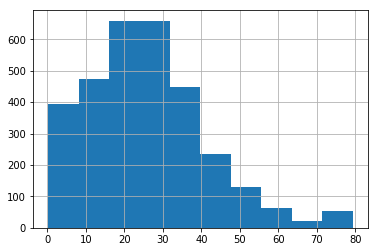

In [34]:
pendata['Penetration'].hist()

Counties that are in chodata but not in pendata:

In [35]:
set(chodata['County']) - set(pendata['County Name'])

{'Agana', 'Leasina'}

Counties that are in pendata but not in chodata...these really can't be used!

In [36]:
setdif = set(pendata['County Name']) - set(chodata['County'])
for item in setdif:
    print(item, end=' ')

McCone Eureka Dundy Aleutians East Wibaux Hooker Antelope Bethel Alpine Glacier Kenedy Skagway-Hoonah-Angoon Keya Paha Arthur Esmeralda North Slope Northwest Arctic Yukon-Koyukuk Cimarron Ziebach Furnas Hayes Hodgeman Kearny Trego Denali Mountrail Lander Kimball Hitchcock Cherry Kodiak Island Pershing Nome St. Thomas DeBaca Lake and Peninsula Red Willow Southeast Fairbanks Prince of Wales-Outer Ketchikan Frontier McKenzie Niobrara Haines Dillingham Ness Sitka Greeley St. John Converse Pending County Designation Thayer Washakie Goshen Divide Hinsdale Piute Aleutians West Yakutat Chase Baca Banner Bristol Bay Ketchikan Gateway Garden Loving Loup Shoshone Valdez-Cordova Wallace Wrangell-Petersburg Daniels 

Build a two-letter state code for merging data:

In [37]:
state_match = {'Alabama':'AL', 'Alaska':'AK', 'American Samoa':'AS', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA',
 'Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE', 'District Of Columbia':'DC',
 'Florida':'FL', 'Georgia':'GA', 'Guam':'GU', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL',
 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 
 'Massachusetts':'MA',
 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 
 'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM',
 'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND', 'Ohio':'OH',
 'Oklahoma':'OK', 'Oregon':'OR', 'Pending State Designation':'GB', 'Pennsylvania':'PA', 'Puerto Rico':'PR', 
 'Rhode Island':'RI', 'South Carolina':'SC',
 'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virgin Islands':'VI',
 'Virginia':'VA',
 'Wake Island':'QW', 'Washington':'WA', 'Washington D.C.':'DC', 'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}


In [38]:
pendata['State'] = pendata['State Name'].map(state_match)

In [39]:
data = pd.merge(pendata, chodata, left_on=['State', 'County Name'], 
                right_on=['State', 'County'], how='right', indicator=True )

In [40]:
data[['County', 'State']].loc[data['_merge'] == 'right_only'].head()

,County,State
27263,Leasina,AS
27264,Agana,GU


In [41]:
data['penet'] = data['Penetration'] / 100
data['share'] = data['Enrolled_y'] / data['Enrolled_x']

Now, we want to generate some group variables to see how they look. The first thing to do is...

In [42]:
data['share'].describe()

count     27263.0
unique    25558.0
top           0.5
freq         13.0
Name: share, dtype: float64

In [43]:
object_holders = list(data.select_dtypes(include=['object']).columns)

In [44]:
for item in object_holders:
    data[item] = data[item].astype(str)

In [47]:
set(data['Plan Type'])

{'1876 Cost',
 'HCPP - 1833 Cost',
 'HMO/HMOPOS',
 'Local PPO',
 'MSA',
 'Medicare-Medicaid Plan HMO/HMOPOS',
 'National PACE',
 'PFFS',
 'Regional PPO'}

In [45]:
data.to_stata('C://Users//mjbaker//Downloads//tempstuff//medishare.dta')